# ДЗ
Условие: Задача состоит в модификации кода градиентного спуска для задачи регрессии (ноутбук лекции - Gradient_descent.ipynb). Необходимо, чтобы ваш градиентный спуск мог решать задачи классификации, а именно линейной классификации и логистической регрессии.
На всякий случай напомню, что код будет разный, поэтому жду от вас две функции градиентного спуска.
Решение задачи можете найти в этой статье - https://dyakonov.org/2018/03/12/логистическая-функция-ошибки/. Там указан необходимый лосс и градиент"

In [1]:
import numpy as np
import random
from sklearn.datasets.samples_generator import make_regression 
import pylab
from scipy import stats
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

создаю датасет 

In [2]:

n_samples = 100

avg_speed = np.random.choice(271, n_samples) + 30

data = pd.DataFrame({'avg_speed': avg_speed})
data['chance_of_accident']=data['avg_speed'].apply(lambda x: 1 if x> 100 else 0)
data.head()

,avg_speed,chance_of_accident
0,87,0
1,278,1
2,62,0
3,249,1
4,170,1


перевожу в нп эрей

In [3]:
x=data[['avg_speed']]
x =x.to_numpy()

y=data['chance_of_accident']
y=y.to_numpy()

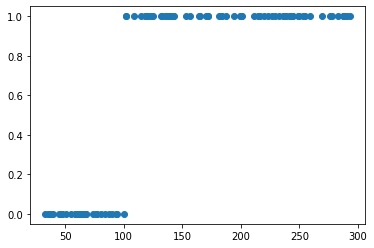

In [4]:
pylab.plot(x,y,'o')
pylab.show()

In [5]:
m,n=np.shape(x)
m,n

(100, 1)

In [6]:
x=np.c_[np.ones(m),x]
x[:3]

array([[  1.,  87.],
       [  1., 278.],
       [  1.,  62.]])

формула с лекции

In [7]:
def gradient_descent_5(alpha, x, y, numIterations):
    
    m = x.shape[0] # 100
    theta=[0.,0.]
    x_transpose = x.transpose() 
    
    for iter in range( 0, numIterations ):
        hypothesis = np.dot(x, theta) #  A
        loss = hypothesis - y # a-y = loss
        J = np.sum(loss ** 2) / (2 * m)  #  logloss
        gradient = np.dot(x_transpose, loss) / m         
        theta = theta - alpha * gradient  # update
    
    return theta

первый вариант

In [8]:
def h(x,theta):
    return 1 / (1 + np.exp(-1 * np.dot(x, theta.transpose()))) # https://pastebin.com/RKbeBDtv


def log_reg(alpha, x, y, numIterations):  
    n = x.shape[1]
    theta = np.ones(n)
    for iter in range( 0, numIterations ):
        a = h(x,theta) 
        loss = (-1) * y * np.log(a) - (1-y) * np.log(1 - a)  # https://dyakonov.org/2018/03/12/логистическая-функция-ошибки/ записал символ в символ
        loss = loss.sum()
        gradient = np.dot((a - y), x) 
        theta = theta - alpha * gradient  
    
    print(theta)
    return theta

In [9]:
%%time
theta = log_reg(0.1, x, y, 10000)

C:\Users\korni\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
C:\Users\korni\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.


[-3797.53047506    37.39384487]
Wall time: 345 ms


In [10]:
data_1 = pd.DataFrame(x)
data_1['class'] = y
data_1['predict'] = data_1.apply(lambda x: h(x[:n+1], theta), axis=1)
data_1.loc[data_1['predict'] <= 0.5, 'pred_'] = 0 
data_1.loc[data_1['predict'] > 0.5, 'pred_'] = 1
data_1

,0,1,class,predict,pred_
0,1.0,87.0,0,4.249053e-237,0.0
1,1.0,278.0,1,1.000000e+00,1.0
2,1.0,62.0,0,0.000000e+00,0.0
3,1.0,249.0,1,1.000000e+00,1.0
4,1.0,170.0,1,1.000000e+00,1.0
5,1.0,55.0,0,0.000000e+00,0.0
6,1.0,64.0,0,0.000000e+00,0.0
7,1.0,199.0,1,1.000000e+00,1.0
8,1.0,66.0,0,0.000000e+00,0.0
9,1.0,143.0,1,1.000000e+00,1.0


тут второй вариант #https://towardsdatascience.com/building-a-logistic-regression-in-python-301d27367c24 он более понятен (для меня). но разбирался я все равно целую неделю 

In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    return np.dot(x, theta)

def probability(theta, x):
    return sigmoid(net_input(theta, x))

In [12]:
def cost_function( theta, x, y):
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
        y * np.log(probability(theta, x)) + (1 - y) * np.log(
            1 - probability(theta, x)))
    return total_cost

def gradient( theta, x, y):
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta,   x)) - y)

In [13]:
def gradient_descent_2(alpha, x, y, numIterations):
    theta=[0.,0.]
    for iter in range( 0, numIterations ):   
        theta = theta - alpha * gradient(theta,x,y)  
    
    print(theta)
    return theta

In [14]:
%%time
theta = gradient_descent_2(100, x, y, 100000)

[-27147.13057332    268.36130755]
Wall time: 1.28 s


In [16]:
data_1 = pd.DataFrame(x)
data_1['class'] = y
data_1['predict'] = data_1.apply(lambda x: probability(x[:n+1], theta), axis=1)
data_1

,0,1,class,predict
0,1.0,87.0,0,0.0
1,1.0,278.0,1,1.0
2,1.0,62.0,0,0.0
3,1.0,249.0,1,1.0
4,1.0,170.0,1,1.0
5,1.0,55.0,0,0.0
6,1.0,64.0,0,0.0
7,1.0,199.0,1,1.0
8,1.0,66.0,0,0.0
9,1.0,143.0,1,1.0
